<h2 style='color:blue' align='left'>Small Image Classification Using CNN (Convolutional Neural Network)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-04-30 18:15:00.756026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 18:15:00.756077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 18:15:00.804088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 18:15:00.898802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 18:15:02.032065: W tensorflow/compiler/tf2

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

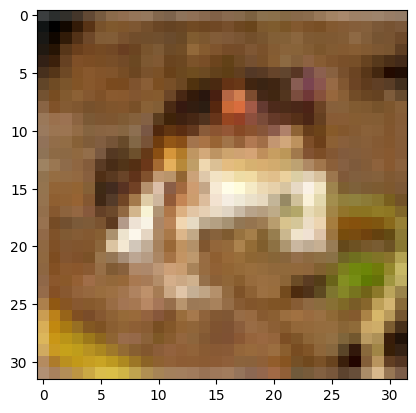

In [4]:
plt.imshow(X_train[0])

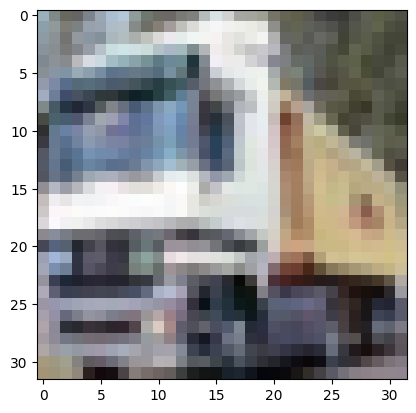

In [5]:
plt.imshow(X_train[1])

Here we see there are 50000 training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

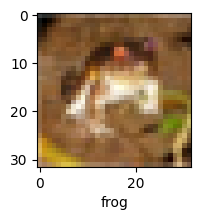

In [12]:
plot_sample(X_train, y_train, 0)

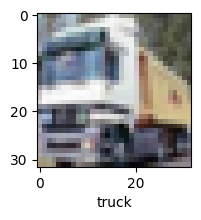

In [13]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
# I have too small GPU VRAM to run the training. 
# Below, I disable the GPU mode.
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Exceed system memory.

# I have to use the google colab to run.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
ann = tf.keras.models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2024-04-30 18:16:21.165257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 18:16:21.165318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 18:16:21.212441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 18:16:21.305862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 18:16:22.467531: W tensorflow/compiler/tf2

Epoch 1/5


2024-04-30 18:16:29.946763: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-30 18:16:30.143020: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcc5878c430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-30 18:16:30.143039: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-30 18:16:30.169863: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1714526190.209698   64604 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 8s 4ms/step - loss: 1.8141 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6245 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5422 - accuracy: 0.4564
Epoch 4/5
 440/1563 [=======>......................] - ETA: 4s - loss: 1.4872 - accuracy: 0.4760

- Use Google Colab to run as below:

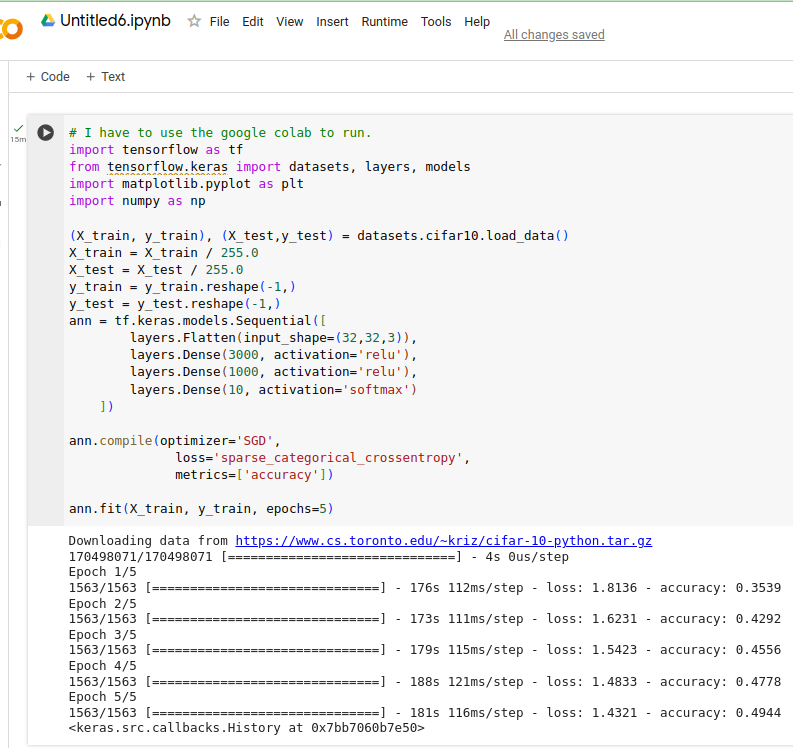

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
# Colab have to run all in one script.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
ann = tf.keras.models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

- run metrics

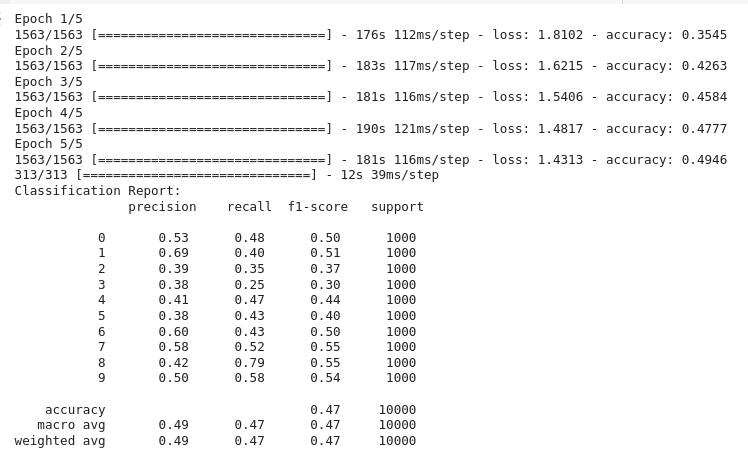

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [ ]:
# My Computer does not enought GPU VRAM to train.
# Use Colab
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# My computer does have enought GPU VRAM to train.
cnn.fit(X_train, y_train, epochs=10)

- Result run from Colab

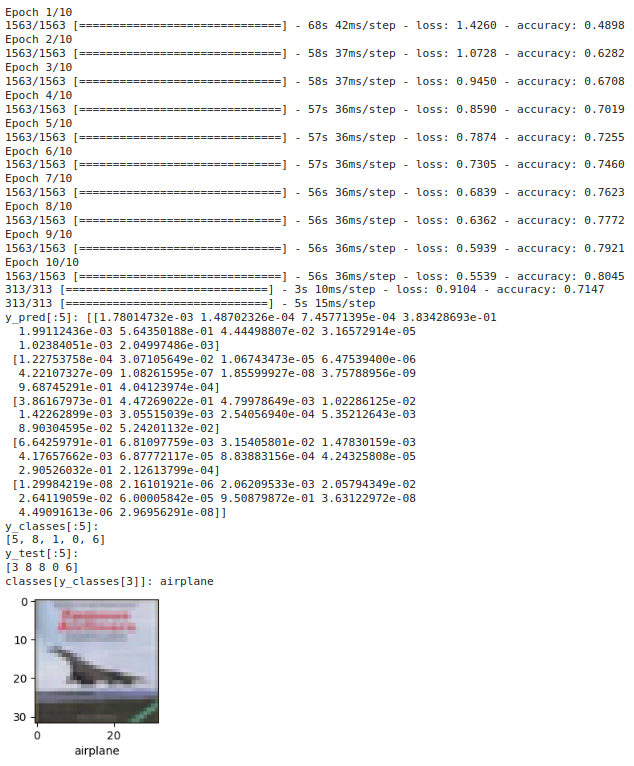

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
# Complete CNN code on Google Colab
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# My computer does have enought GPU VRAM to train.
cnn.fit(X_train, y_train, epochs=10)
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
print('y_pred[:5]:') 
print(y_pred[:5])
# true label: [3, 8, 8, 0, 6] ("cat", "ship", "ship", "airplane", "frog"]
y_classes = [np.argmax(element) for element in y_pred]
print('y_classes[:5]:') 
print(y_classes[:5]) 
# predict class: [5, 8, 1, 0, 6] ("dog", "ship". "automobile", "airplane", "frog"]
# some of them got wrong.
print('y_test[:5]:')
print(y_test[:5])
plot_sample(X_test, y_test, 3)
# Orginal test sample is 3: "airplan", predict is airplane.

# make the prediction:
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print('classes[y_classes[0]]:', classes[y_classes[0]]) # airplane.
print('classes[y_classes[3]]:', classes[y_classes[3]]) # cat

# Print the final report.
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

- CNN result from colab:

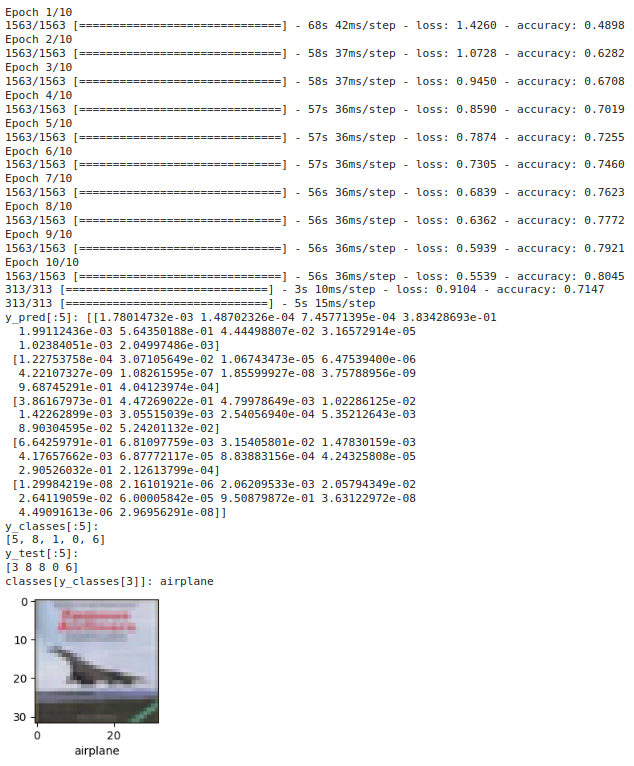

<h3 style='color:purple'>Exercise</h3>

- Use CNN to do handwritten digits classification using MNIST dataset. 
- You can use this notebook as a reference:

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

- Above we used ANN for digits classification. 
- You need to modify this code to use CNN instead. 
- Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. 
- Once you have worked on this problem on your own, you can check my solution by clicking on this link: 
- [Solution]

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb